In [ ]:
#hide
from funnelplot.core import *

# Funnel plot
> Simple funnel plots for visualising sub-group variance.

This package provides simple [funnel plots](https://psmu.improvement.nhs.uk/psc-shared-library/measurement-evidence-base/16-funnel-plots-for-comparing-institutional-performance/file) in Python, using Matplotlib. This lets you quickly see whether sub-groups of a population are outliers compared to the full population.

Two methods are provided:

* **parametric funnelplot** which uses a standard distribution to estimate the intervals of the funnel (usually a normal distribution)
* **bootstrap funnelplot** which uses bootstrapped percentiles to estimate the intervals of the funnel 

A utility function `funnel()` to make it easy to plot data by grouping Pandas DataFrames in a Seaborn-like API is provided.

## Example
Data of test performance for California schools from [`pydataset/Caschool`](https://pypi.org/project/pydataset/).

    funnel(df=data("Caschool"), x="testscr", group="county")

<img src="imgs/caschool_example.png" width="100%">

## Install

`pip install funnelplot`

## Examples

### Full caschool example

C:\Users\John\Dropbox\devel\funnelplot\funnelplot\core.py:14: RuntimeWarning: invalid value encountered in true_divide
  return band / np.sqrt(group_size)
C:\Users\John\Dropbox\devel\funnelplot\funnelplot\core.py:14: RuntimeWarning: divide by zero encountered in true_divide
  return band / np.sqrt(group_size)


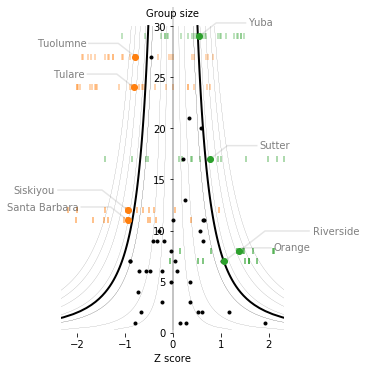

In [ ]:
# load some example data
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from funnelplot.core import funnel

# create a suitable axis
fig,ax = plt.subplots(figsize=(4,6))
ax.set_frame_on(False)

# funnel plot, using 0.5% -> 99.5% interval
funnel(df=data("Caschool"), x="testscr", group="county", percentage=99.5, error_mode="data")

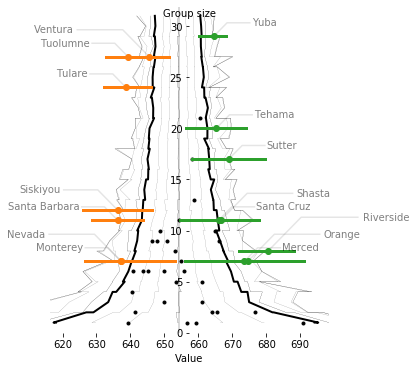

In [ ]:
# use bootstrap instead of normal fit
fig,ax = plt.subplots(figsize=(5,6))
ax.set_frame_on(False)
funnel(df=data("Caschool"), x='testscr', group="county", bootstrap_mode=True, error_mode="bootstrap")

### Synthetic data example

In [ ]:
## Synthetic data
import numpy as np
import random
random.seed(2020)
np.random.seed(2020)
groups = []
p_mean, p_std = 0, 1
# random groups, with different sizes, means and std. devs.
for i in range(25):
    n_group = np.random.randint(1, 80)
    g_std =  np.random.uniform(0.1, 4.5) 
    g_mean = np.random.uniform(-1.9, 0.5)
    groups.append(np.random.normal(p_mean + g_mean,
                                   p_std + g_std, 
                                   n_group))

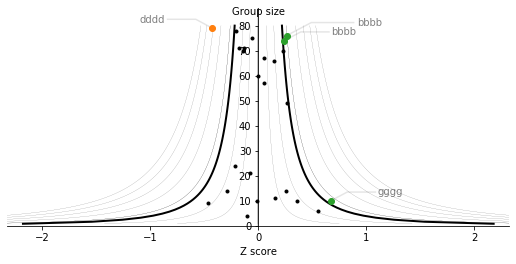

In [ ]:
ax, fig = plt.subplots(figsize=(9, 4))
funnel_plot(
    groups,
    labels=[random.choice("abcdefg") * 4 for i in range(len(groups))],
    percentage=95,
)

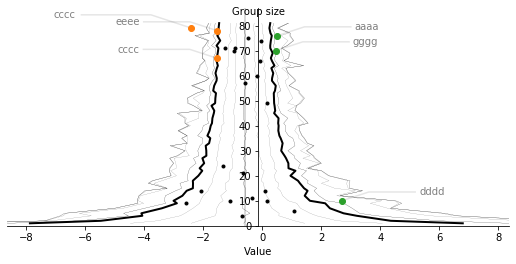

In [ ]:
ax, fig = plt.subplots(figsize=(9, 4))
# bootstrap version, using medians instead of means
funnel_plot_bootstrap(
    groups,
    labels=[random.choice("abcdefg") * 4 for i in range(len(groups))],
    percentage=95,
    stat=np.median
)

## API

* `funnel(df, x, group, bootstrap_mode=False)` show a DataFrame `df` as a funnel plot, rendering column `x` and grouping the data by `group`.

        Parameters:
            df: DataFrame
                The data to be shown.
            x:  string, column name
                The column of the frame to render as datapoints.
            group: string, column name
                The column to group the frame by
            bootstrap_mode: boolean, optional (default False)
                If True, uses the funnel_plot_bootstrap() function; otherwise
                use the parameteric funnel_plot() function
            **kwargs:
                passed to funnel_plot() / funnel_plot_bootstrap()
            
            
* `funnel_plot(data_groups, ...)` plot a list of arrays as a funnel plot.

        Parameters:
            data_groups: list of 1D arrays
                a list of 1D arrays the individual groups to be analysed.
            ax: axis, optional
                an Matplotlib axis to draw onto
            dist: distribution function, like scipy.stats.norm(0,1)
                function to use to get the ppf and cdf of for plotting
            percentage: float, 0.0 -> 100.0 (default 95)
                percentage  of interval enclosed (e.g. percentage=95 will enclose 2.5% to 97.5%)
            labels: list of strings, optional
                one label string per group, will be shown only for those groups that lie outside the funnel
            left_color: matplotlib color, optional (default C1)
                color to render points to the left of the funnel bounds (negative outliers)
            right_color: matplotlib color, optional (default C2)
                color to render points to the right of the funnel bounds (positive outliers)        
            error_mode: string, optional (default "data")
                For each outlier group, can show:
                    "data": original data values for that group as a dot plot
                    "none": no error bars
                    "bootstrap": 95% bootstrap intervals, as lines
                    "ci": 95% CI intervals, as lines
            show_rug: boolean, optional (default False):
                If True, show a rug plot at the bottom of the graph, for
                the whole group population
            show_contours: boolean optional (default True)
                true if additional contours shown


* `funnel_plot_bootstrap(data_groups, ...)` plot a list of arrays as a funnel plot, using bootstrapped intervals instead of a parametric distribution.

        Parameters:
            data_groups: list of 1D arrays
                a list of 1D arrays the individual groups to be analysed.
            ax: axis, optional
                an Matplotlib axis to draw onto
            percentage: float, 0.0 -> 100.0 (default 95)
                percentage  of interval enclosed (e.g. percentage=95 will enclose 2.5% to 97.5%)
            labels: list of strings, optional
                one label string per group, will be shown only for those groups that lie outside the funnel
            left_color: matplotlib color, optional (default C1)
                color to render points to the left of the funnel bounds (negative outliers)
            right_color: matplotlib color, optional (default C2)
                color to render points to the right of the funnel bounds (positive outliers)
            bootstrap_n: int, optional (default 1000)
                number of runs in the bootstrap
            error_mode: string, optional (default "data")
                For each outlier group, can show:
                    "data": original data values for that group as a dot plot
                    "none": no error bars
                    "bootstrap": 95% bootstrap intervals, as lines
                    "ci": 95% CI intervals, as lines
            show_rug: boolean, optional (default False):
                If True, show a rug plot at the bottom of the graph, for
                the whole group population            
            show_contours: boolean optional (default True)
                true if additional contours shown
            stat: function like np.mean, optional
                statistic to use when plotting the funnel plot  